## Perform Time Series Analysis on:
## 1. Monthly Cola Production in Ausralia
## 2. IceCream Sales
## 3. USD to INR

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('../datasets/monthly-cola-production-in-austr.csv')
print(df.head())
print(df.tail())

     Month  cola
0  1956-01  93.2
1  1956-02  96.0
2  1956-03  95.2
3  1956-04  77.1
4  1956-05  70.9
       Month   cola
471  1995-04  127.0
472  1995-05  151.0
473  1995-06  130.0
474  1995-07  119.0
475  1995-08  153.0


In [34]:
df['completeDate'] = df['Month'] + '-01'
df['completeDate'] =pd.to_datetime(df.completeDate)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Month         476 non-null    object        
 1   cola          476 non-null    float64       
 2   completeDate  476 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.3+ KB


In [35]:
df.set_index('completeDate',inplace = True)
df

,Month,cola
completeDate,,
1956-01-01,1956-01,93.2
1956-02-01,1956-02,96.0
1956-03-01,1956-03,95.2
1956-04-01,1956-04,77.1
1956-05-01,1956-05,70.9
...,...,...
1995-04-01,1995-04,127.0
1995-05-01,1995-05,151.0
1995-06-01,1995-06,130.0


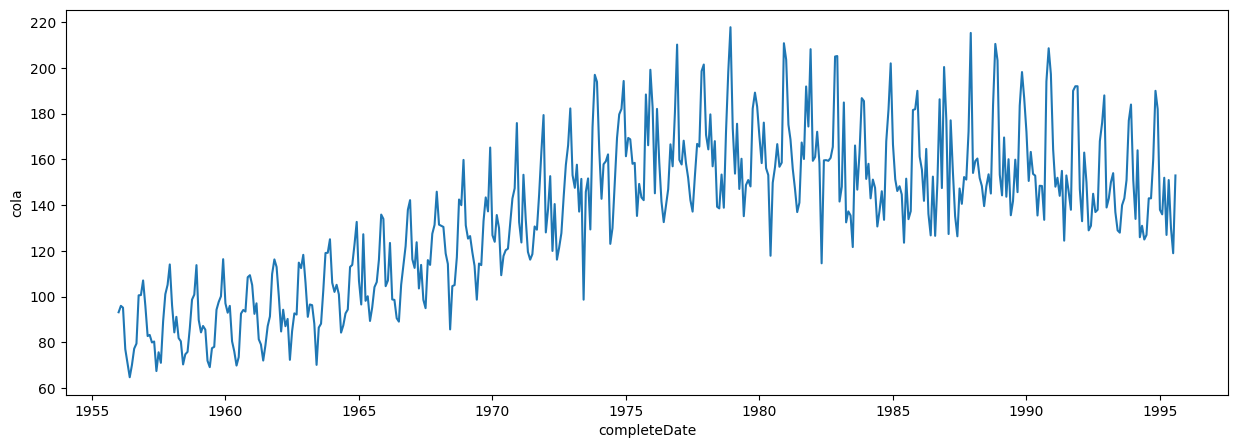

In [36]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x = df.index, y = df.cola)
plt.show()

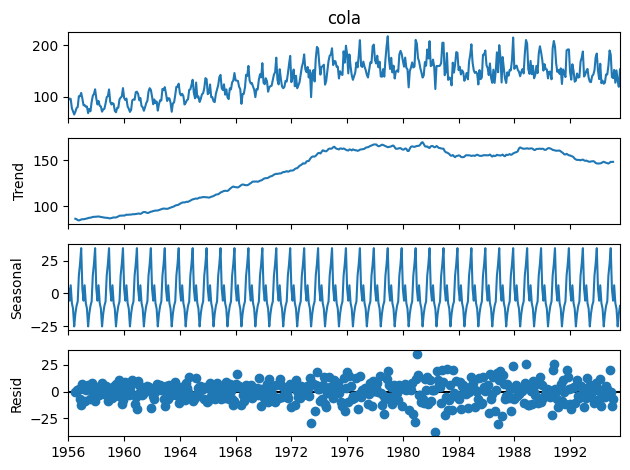

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.cola, period=12)
fig = decomposition.plot()
plt.show()

In [38]:
print(df.info())
df['rollingMean'] = df['cola'].rolling(window = 12).mean()
df['rollingStd'] = df['cola'].rolling(window = 12).std()
df.dropna(inplace = True)
print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   476 non-null    object 
 1   cola    476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 465 entries, 1956-12-01 to 1995-08-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        465 non-null    object 
 1   cola         465 non-null    float64
 2   rollingMean  465 non-null    float64
 3   rollingStd   465 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.2+ KB
None


,Month,cola,rollingMean,rollingStd
completeDate,,,,
1956-12-01,1956-12,107.1,86.041667,14.264798
1957-01-01,1957-01,95.9,86.266667,14.408541
1957-02-01,1957-02,82.8,85.166667,14.098442
1957-03-01,1957-03,83.3,84.175000,13.742577
1957-04-01,1957-04,80.0,84.416667,13.631903
...,...,...,...,...
1995-04-01,1995-04,127.0,146.166667,21.391729
1995-05-01,1995-05,151.0,147.833333,20.875533
1995-06-01,1995-06,130.0,148.250000,20.423360


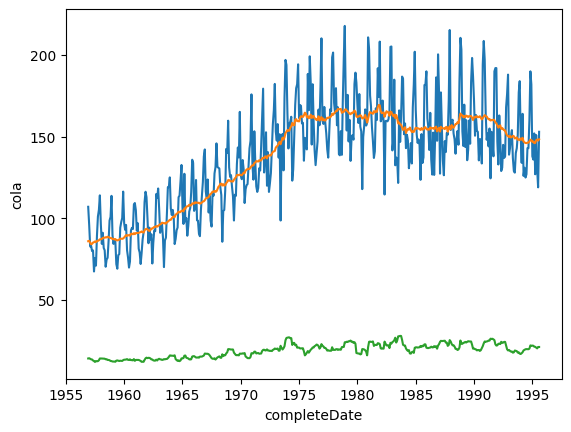

In [39]:
#Plot the original data, rolling mean, and rolling standard deviation
sns.lineplot(x = df.index, y = df.cola)
sns.lineplot(x = df.index, y = df.rollingMean)
sns.lineplot(x = df.index, y = df.rollingStd)
plt.show()

ADF Value: 0.2099
Not stationary


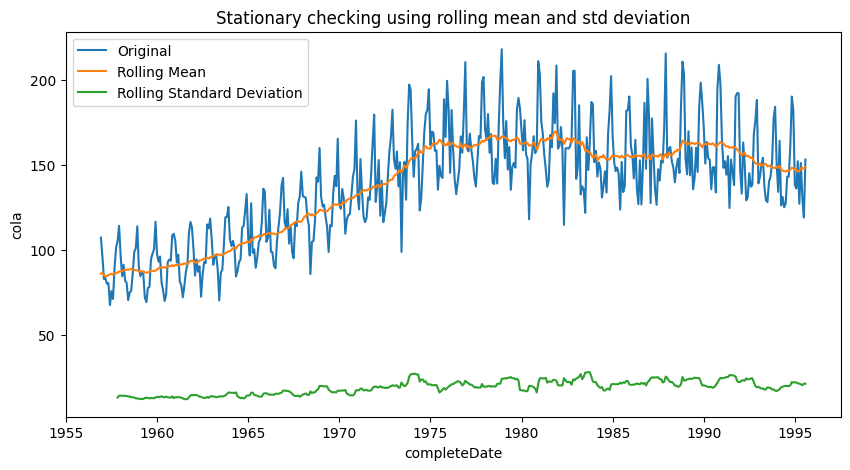

In [48]:
def test_stationary(df, var):
    df['rollMean'] = df[var].rolling(window = 12).mean()
    df['rollingStd'] = df[var].rolling(window = 12).std()

    from statsmodels.tsa.stattools import adfuller
    adf_result = adfuller(df[var])
    p_value = adf_result[1]

    print(f"ADF Value: {p_value:.4f}")
    if p_value <0.05 :
        print("time series is stationary")
    else:
        print("Not stationary")
    
    #Plot
    plt.figure(figsize = (10,5))
    sns.lineplot(data = df, x = df.index, y = var, label = "Original")
    sns.lineplot(data = df, x = df.index, y = 'rollingMean',label = 'Rolling Mean')
    sns.lineplot(data = df, x = df.index, y = 'rollingStd',label = 'Rolling Standard Deviation')
    plt.title('Stationary checking using rolling mean and std deviation')
    plt.legend()
    plt.show()

#calling the function to test stationary
test_stationary(df,'cola')